**About DataSet**
- Context
Reduction of child mortality is reflected in several of the United Nations' Sustainable Development Goals and is a key indicator of human progress.
The UN expects that by 2030, countries end preventable deaths of newborns and children under 5 years of age, with all countries aiming to reduce under‑5 mortality to at least as low as 25 per 1,000 live births.

- Parallel to notion of child mortality is of course maternal mortality, which accounts for 295 000 deaths during and following pregnancy and childbirth (as of 2017). The vast majority of these deaths (94%) occurred in low-resource settings, and most could have been prevented.

- In light of what was mentioned above, Cardiotocograms (CTGs) are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more.

- Data
This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by three expert obstetritians into 3 classes:

- Normal
- Suspect
- Pathological



In [3]:
#!pip install xgboost
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score,precision_recall_curve, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier, XGBRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.svm import SVC
import shap
import pandas as pd

In [4]:
df=pd.read_csv('fetal_health.csv')
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120,0.000,0.0,0.000,0.000,0.0,0.0,73,0.5,43,...,62,126,2,0,120,137,121,73,1,2
1,132,0.006,0.0,0.006,0.003,0.0,0.0,17,2.1,0,...,68,198,6,1,141,136,140,12,0,1
2,133,0.003,0.0,0.008,0.003,0.0,0.0,16,2.1,0,...,68,198,5,1,141,135,138,13,0,1
3,134,0.003,0.0,0.008,0.003,0.0,0.0,16,2.4,0,...,53,170,11,0,137,134,137,13,1,1
4,132,0.007,0.0,0.008,0.000,0.0,0.0,16,2.4,0,...,53,170,9,0,137,136,138,11,1,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   int64  
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   int64  
 8   mean_value_of_short_term_variability  

In [6]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [7]:
for key,value in df.items():
    print("-", key, ":", len(value.unique()))

- baseline value : 48
- accelerations : 20
- fetal_movement : 102
- uterine_contractions : 16
- light_decelerations : 16
- severe_decelerations : 2
- prolongued_decelerations : 6
- abnormal_short_term_variability : 75
- mean_value_of_short_term_variability : 57
- percentage_of_time_with_abnormal_long_term_variability : 87
- mean_value_of_long_term_variability : 249
- histogram_width : 154
- histogram_min : 109
- histogram_max : 86
- histogram_number_of_peaks : 18
- histogram_number_of_zeroes : 9
- histogram_mode : 88
- histogram_mean : 103
- histogram_median : 95
- histogram_variance : 133
- histogram_tendency : 3
- fetal_health : 3


In [8]:
print("Min Fetal Beat:", df["baseline value"].min())
print("Max Fetal Beat:", df["baseline value"].max())

Min Fetal Beat: 106
Max Fetal Beat: 160


In [9]:
#1 =Normal, 2=Subsect, 3=Pathological
df['fetal_health'].value_counts()

1    1655
2     295
3     176
Name: fetal_health, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

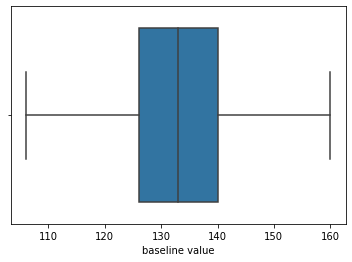

In [10]:
sns.boxplot(x="baseline value", data=df)
plt.show

<AxesSubplot:xlabel='fetal_health', ylabel='count'>

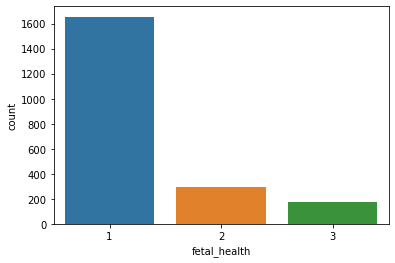

In [11]:
normal= (df["fetal_health"]==1)
suspect=(df["fetal_health"]==2)
pathological=(df["fetal_health"]==3)

sns.countplot(data=df, x='fetal_health')


<AxesSubplot:xlabel='baseline value', ylabel='count'>

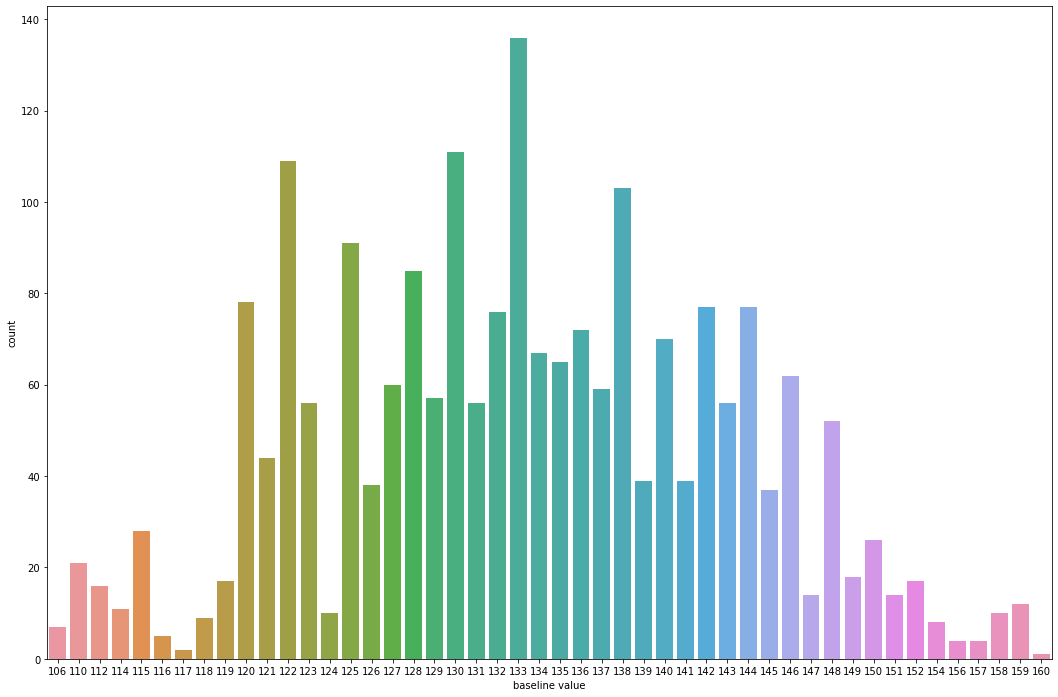

In [12]:
plt.figure(figsize=[18,12])
sns.countplot(data=df, x='baseline value')

In [13]:
df.drop(['histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency'], axis=1, inplace=True)

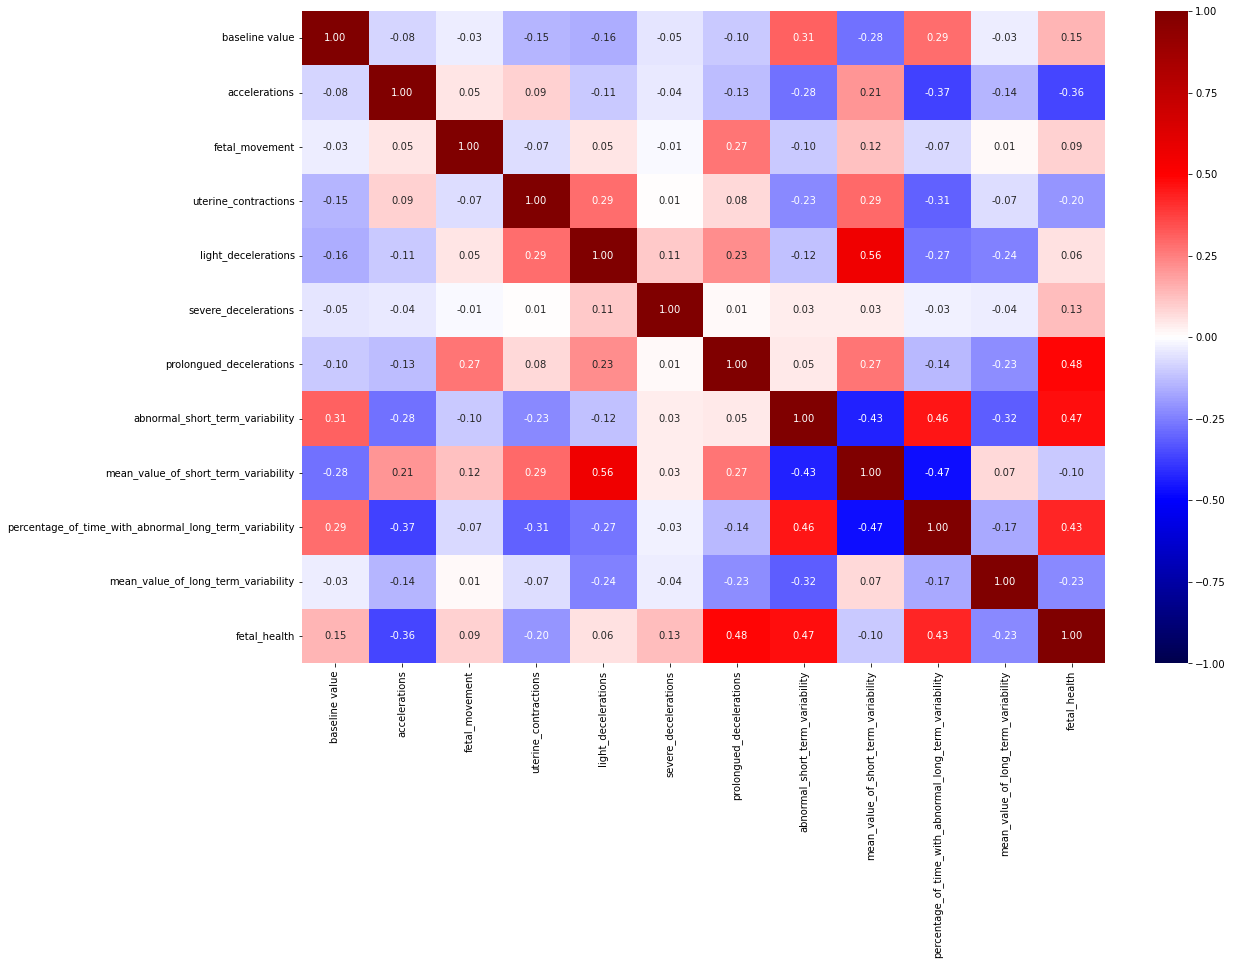

In [22]:
plt.figure(figsize=[18,12])
sns.heatmap(df.corr(), cmap= "seismic", annot=True, vmin=-1, vmax=1, fmt='.2f');

In [16]:
#for i in cols:
#    sns.swarmplot(x=data["fetal_health"], y=data[i], color="black", alpha=0.5 )
#    sns.boxenplot(x=data["fetal_health"], y=data[i], palette=colours)
#    plt.show()

In [14]:
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'fetal_health'],
      dtype='object')

(array([-20.,   0.,  20.,  40.,  60.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

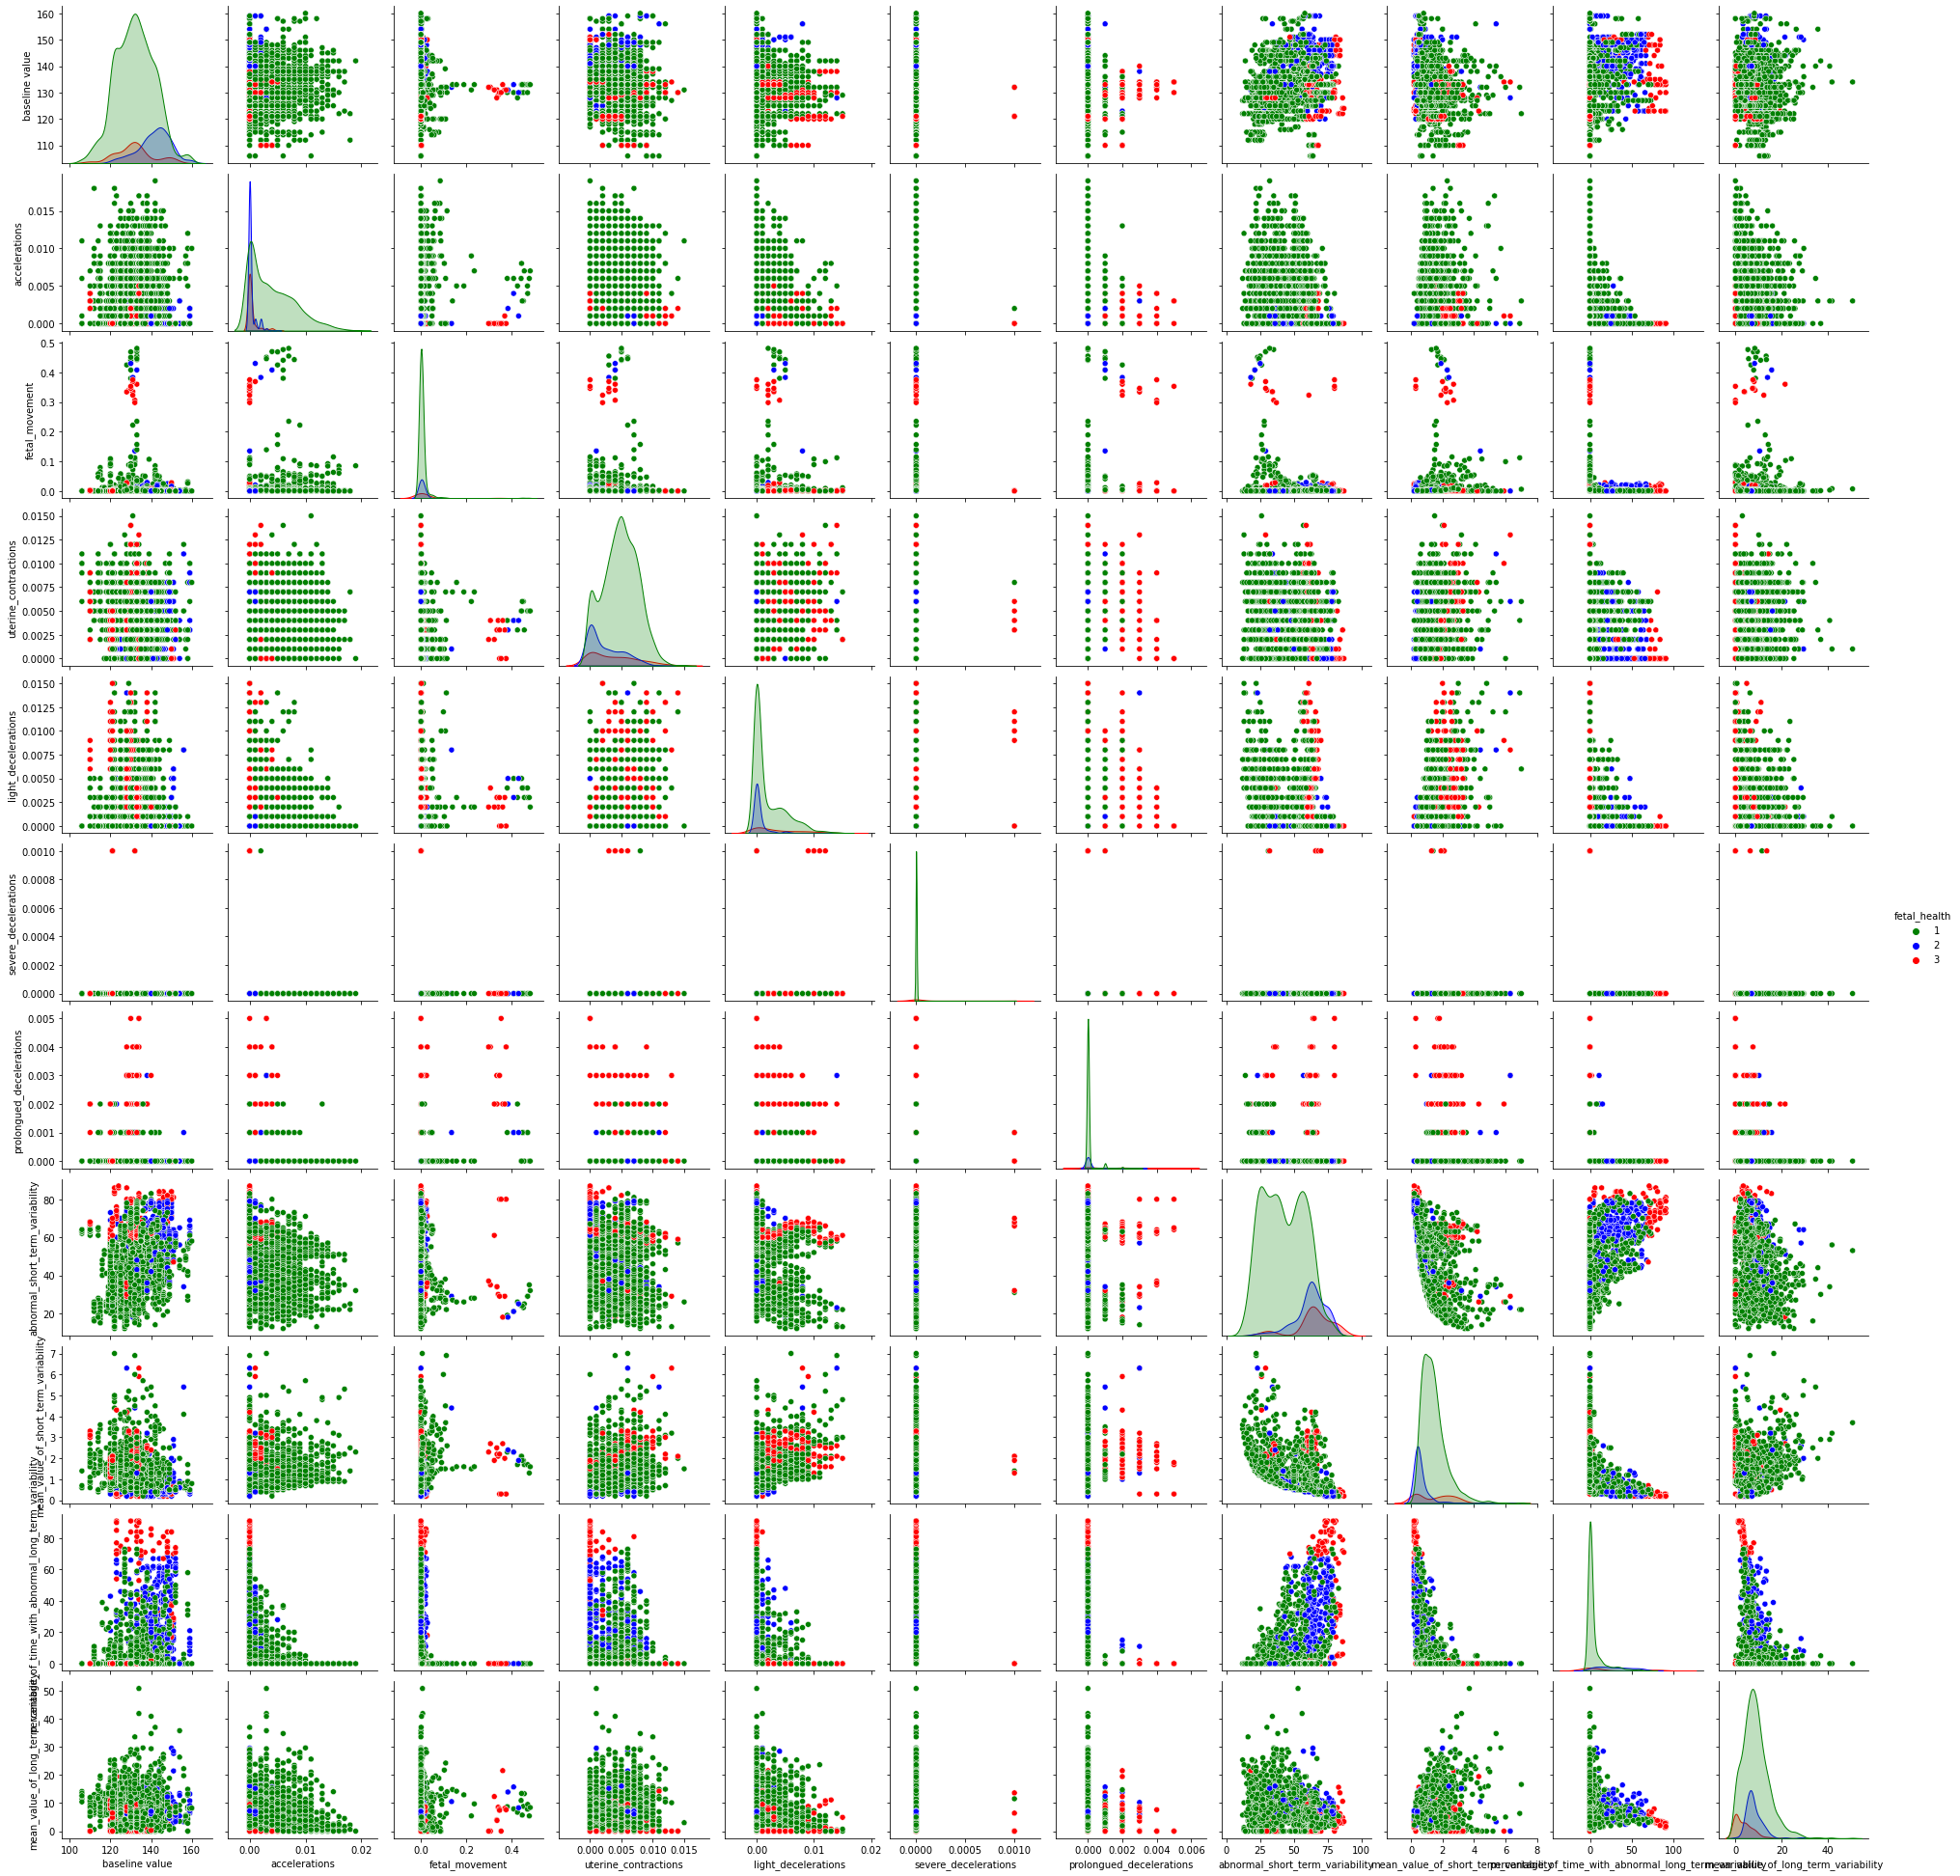

In [15]:
sns.pairplot(df, hue='fetal_health', palette={1:"green", 2: "blue", 3:"red"});
plt.xticks(rotation=90)

<AxesSubplot:xlabel='baseline value', ylabel='fetal_health'>

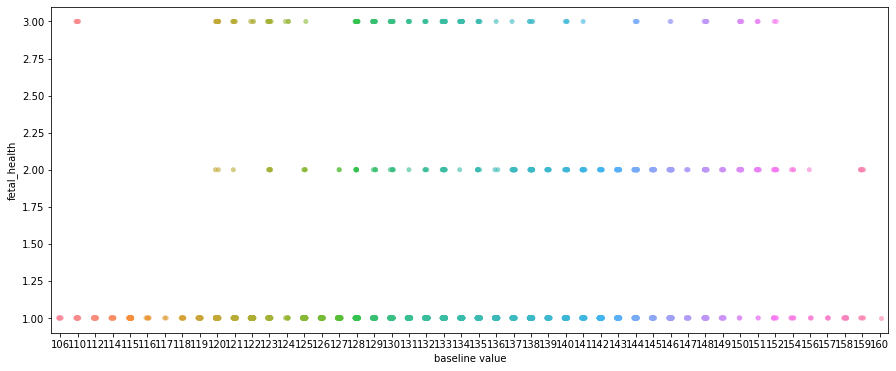

In [16]:
plt.figure(figsize=[15,6])
sns.stripplot(x='baseline value', y='fetal_health', data=df, alpha=0.6)

<AxesSubplot:xlabel='fetal_health', ylabel='prolongued_decelerations'>

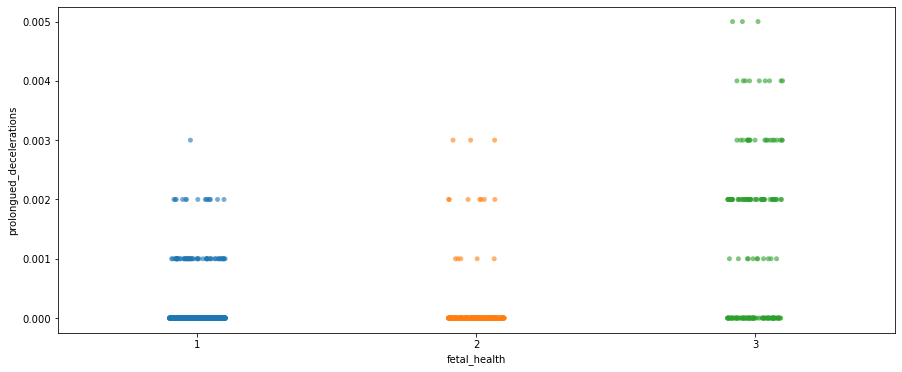

In [17]:
plt.figure(figsize=[15,6])
sns.stripplot(x='fetal_health',y='prolongued_decelerations', data=df, alpha=0.6)

In [23]:
#plt.figure(figsize=[32,6])
#sns.stripplot(x='fetal_movement', y='fetal_health', data=df, alpha=0.6)

In [ ]:
#features=['accelerations','prolongued_decelerations', 'abnormal_short_term_variability',
#         'percentage_of_time_with_abnormal_long_term_variability']
#for feature in features:
#    sns.swarmplot(x=df['fetal_health'], y=df[feature], color="black", alpha=0.6)
#    sns.boxenplot(x=df['fetal_health'], y=df[feature])

In [18]:
df1=df.copy()

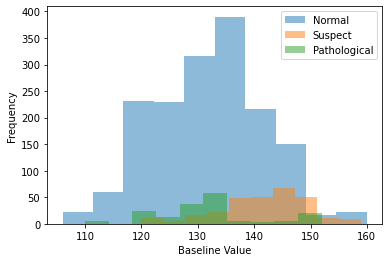

In [19]:
normal= (df1["fetal_health"]==1)
suspect=(df1["fetal_health"]==2)
pathological=(df1["fetal_health"]==3)

plt.hist(df1[normal]['baseline value'], bins=10,alpha=0.5, label="Normal")
plt.hist(df1[suspect]['baseline value'], bins=10, alpha=0.5, label="Suspect")
plt.hist(df1[pathological]['baseline value'], bins=10, alpha=0.5, label="Pathological")

plt.xlabel("Baseline Value")
plt.ylabel("Frequency")
plt.legend(loc="upper right")

In [20]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,fetal_health
0,120,0.000,0.0,0.000,0.000,0.0,0.0,73,0.5,43,2.4,2
1,132,0.006,0.0,0.006,0.003,0.0,0.0,17,2.1,0,10.4,1
2,133,0.003,0.0,0.008,0.003,0.0,0.0,16,2.1,0,13.4,1
3,134,0.003,0.0,0.008,0.003,0.0,0.0,16,2.4,0,23.0,1
4,132,0.007,0.0,0.008,0.000,0.0,0.0,16,2.4,0,19.9,1


**Normalisazyon**

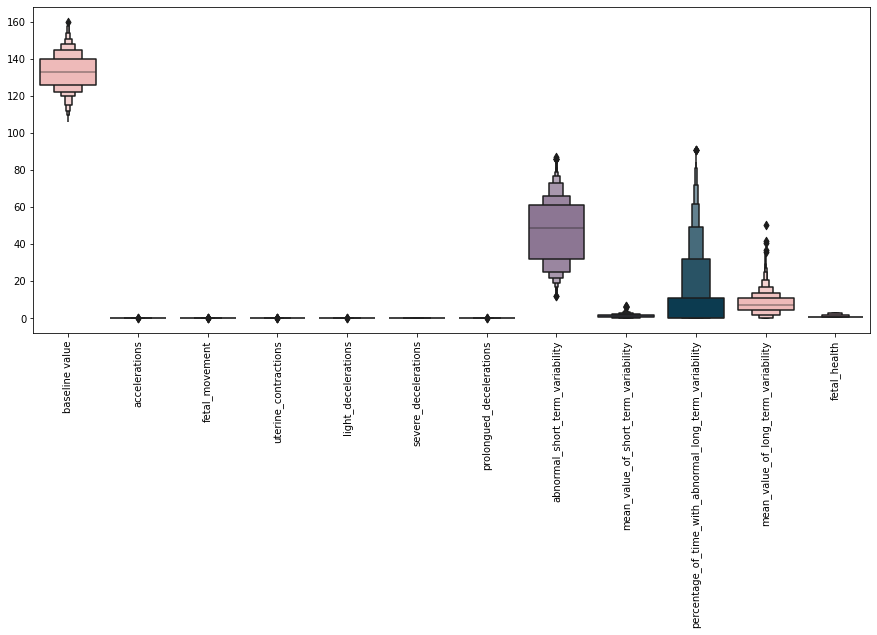

In [21]:
#Before Normalisazyon
shades =["#f7b2b0","#c98ea6","#8f7198","#50587f", "#003f5c"]
plt.figure(figsize=(15,6))
sns.boxenplot(data = df,palette = shades)
plt.xticks(rotation=90)
plt.show()

**Model Building**

In [22]:
X=df1.loc[:,['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability']]
y=df1['fetal_health']

In [23]:
X_train, X_test,y_train,y_test= train_test_split(X,y, test_size=0.2,random_state=42)
X_train,X_val,y_train,y_val=train_test_split(X,y, test_size=0.2,random_state=42)

In [28]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [25]:
rf = RandomForestClassifier()

acc_rf = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
acc_rf

array([0.93235294, 0.92941176, 0.93529412, 0.93235294, 0.95294118])

In [29]:
importances_rf = pd.DataFrame({'Feature':X_train.columns,'Importance':np.round(rf.feature_importances_,3)})
importances_rf = importances_rf.sort_values('Importance', ascending=False).set_index('Feature')
importances_rf

,Importance
Feature,
abnormal_short_term_variability,0.193
percentage_of_time_with_abnormal_long_term_variability,0.150
mean_value_of_short_term_variability,0.146
baseline value,0.103
mean_value_of_long_term_variability,0.101
prolongued_decelerations,0.095
accelerations,0.074
uterine_contractions,0.062
fetal_movement,0.042


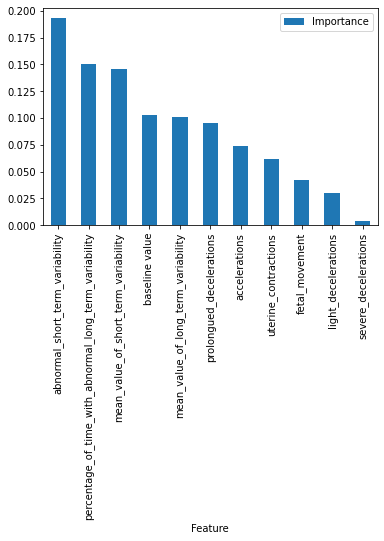

In [30]:
importances_rf.plot.bar();

In [31]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [32]:
dt = DecisionTreeClassifier() 

acc_dt = cross_val_score(dt, X_train, y_train, cv=5, scoring='accuracy')
acc_dt

array([0.92647059, 0.90294118, 0.89705882, 0.90588235, 0.91764706])

In [33]:
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier
num_trees = 30
kfold = model_selection.KFold(n_splits=5, random_state=42, shuffle=True)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=42)
results = model_selection.cross_val_score(model, X, y, cv=kfold)
results
#print(results.mean())

array([0.8943662 , 0.88705882, 0.87294118, 0.86588235, 0.92470588])

**Models Requiring Normalization**

In [34]:
scale=StandardScaler()
X_train_transformed =scale.fit_transform(X_train)
X_val_transformed =scale.transform(X_val)
X_test_transformed = scale.transform(X_test)

In [35]:
X_train_transformed[0:5]

array([[-0.81890715, -0.82497568, -0.20426125,  1.2185553 , -0.63734982,
        -0.06430142, -0.26814776, -0.85965686, -0.26258884, -0.36703781,
         0.82903218],
       [ 0.69242905, -0.82497568, -0.20426125, -1.15901611, -0.63734982,
        -0.06430142, -0.26814776,  0.76272307, -0.60448392,  1.23386142,
         0.51383432],
       [-1.12117438, -0.82497568, -0.20426125, -1.49866917, -0.29694935,
        -0.06430142, -0.26814776, -1.55496255,  0.53516637, -0.53264807,
         0.96912012],
       [ 0.39016181,  0.46404882, -0.20426125,  0.19959612,  0.04345112,
        -0.06430142, -0.26814776, -0.6278883 , -0.49051889, -0.53264807,
        -0.57184721],
       [ 0.89394054, -0.05156098, -0.20426125, -0.14005694, -0.63734982,
        -0.06430142, -0.26814776, -0.0484669 , -0.71844895,  0.95784431,
        -0.41424828]])

In [36]:
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train_transformed, y_train)
acc_lr = cross_val_score(lr, X_train_transformed, y_train, cv=5, scoring='accuracy')
acc_lr

array([0.90882353, 0.86470588, 0.89411765, 0.85588235, 0.87647059])

In [37]:
knn = KNeighborsClassifier()
knn.fit(X_train_transformed, y_train)
acc_knn = cross_val_score(knn, X_train_transformed, y_train, cv=5, scoring='accuracy')
acc_knn
#print('KNN Training Score: {:6.2f}%'.format(100*knn.score(X_train_transformed, y_train)))
#print('KNN Test Score: {:6.2f}%'.format(100*knn.score(X_test_transformed, y_test)))

array([0.89705882, 0.89117647, 0.90294118, 0.87941176, 0.92941176])

In [38]:
svc = SVC()
svc.fit(X_train_transformed, y_train)
acc_svc = cross_val_score(svc, X_train_transformed, y_train, cv=5, scoring='accuracy')
acc_svc

array([0.92058824, 0.87941176, 0.89411765, 0.87647059, 0.90882353])

In [39]:
results = pd.DataFrame({
    'Model': ['Random Forest', 'Decision Tree',
              'Logistic Regression', 'KNN', 'SVC'],
    'Cross Validated Score (Mean)': [acc_rf.mean(), acc_dt.mean(), acc_lr.mean(),
                                     acc_knn.mean(), acc_svc.mean()],
    'Cross Validated Score (Std)': [acc_rf.std(), acc_dt.std(), acc_lr.std(),
                                    acc_knn.std(), acc_svc.std()]})

result_df = results.sort_values(by='Cross Validated Score (Mean)', ascending=False)
result_df = result_df.set_index('Model')
result_df['Cross Validated Score (Mean)'] = (result_df['Cross Validated Score (Mean)']*100).round(2)
result_df['Cross Validated Score (Std)'] = (result_df['Cross Validated Score (Std)']*100).round(2)
result_df

,Cross Validated Score (Mean),Cross Validated Score (Std)
Model,,
Random Forest,93.65,0.84
Decision Tree,91.00,1.06
KNN,90.00,1.66
SVC,89.59,1.69
Logistic Regression,88.00,1.93


In [40]:
#rf = RandomForestClassifier()
#rf.fit(X_train, y_train)

#rf.score(X_test,y_test)

In [41]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = [12,8], fontsize=18):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to [12,8].
    fontsize: int
        Font size for axes labels. Defaults to 18.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)
    plt.figure(figsize=figsize)
    
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

Text(0.5, 1.0, 'RandomF Confusion Matrix')

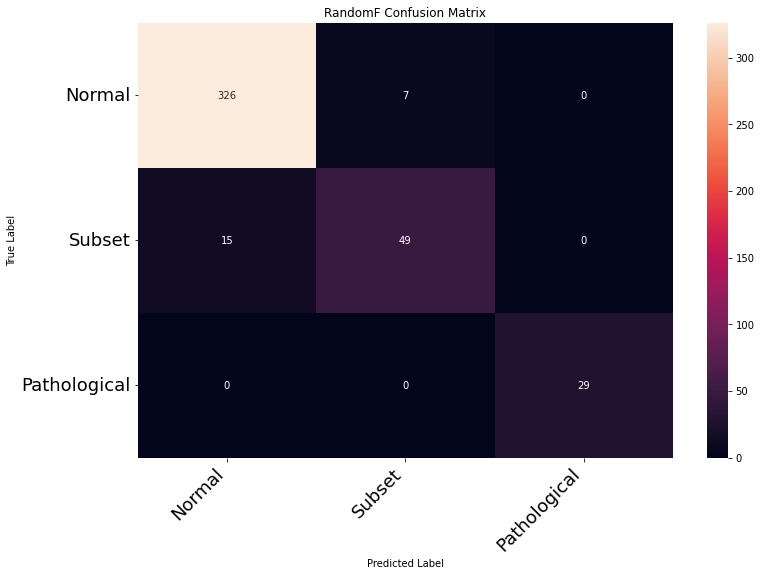

In [43]:
print_confusion_matrix(confusion_matrix(y_test,rf.predict(X_test)),['Normal', 'Subset','Pathological'])
plt.title('RandomF Confusion Matrix')

Text(0.5, 1.0, 'KNN Confusion Matrix')

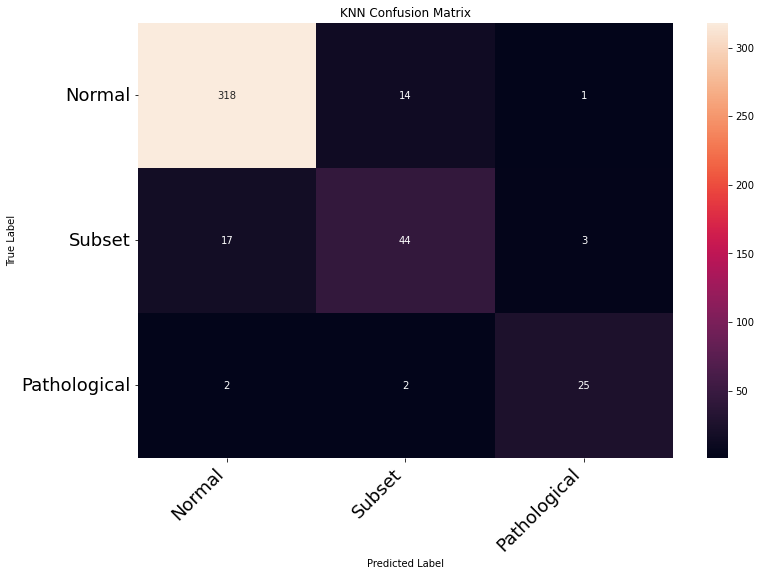

In [45]:
print_confusion_matrix(confusion_matrix(y_test,knn.predict(X_test_transformed)),['Normal', 'Subset','Pathological'])
plt.title('KNN Confusion Matrix')

Text(0.5, 1.0, 'SVC Confusion Matrix')

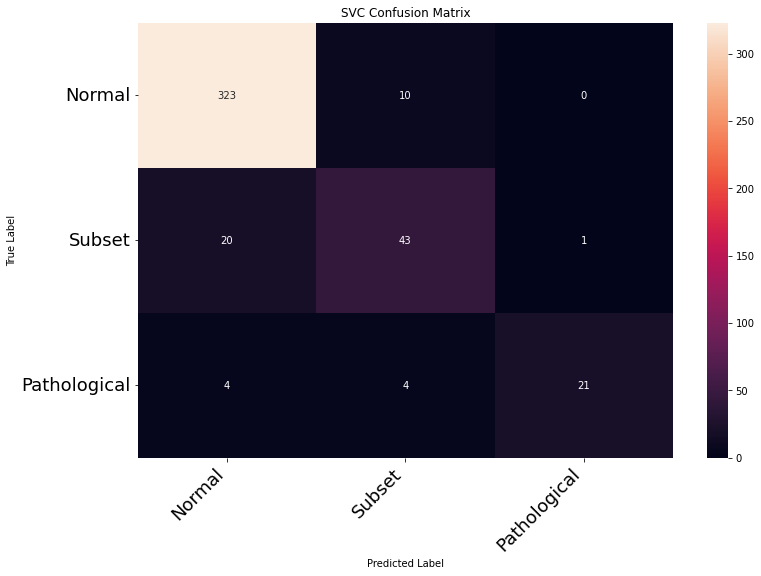

In [46]:
print_confusion_matrix(confusion_matrix(y_test,svc.predict(X_test_transformed)),['Normal', 'Subset','Pathological'])
plt.title('SVC Confusion Matrix')

Text(0.5, 1.0, 'LinearR Confusion Matrix')

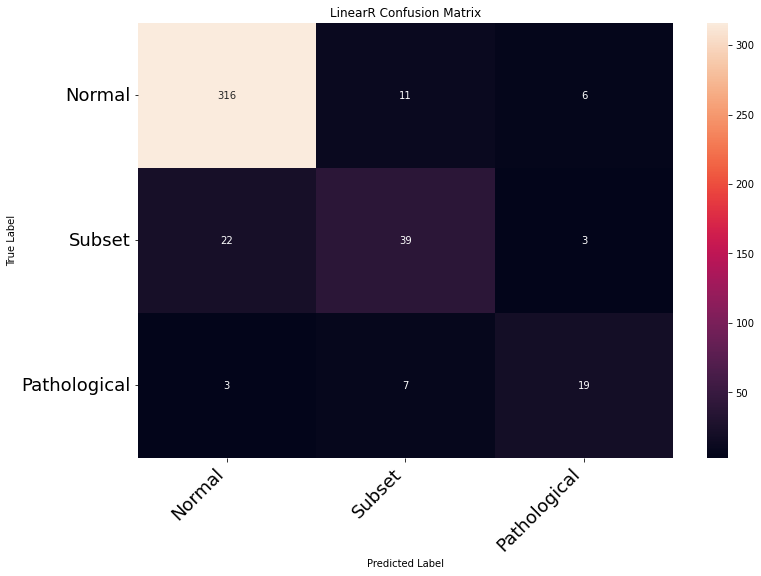

In [47]:
print_confusion_matrix(confusion_matrix(y_test,lr.predict(X_test_transformed)),['Normal', 'Subset','Pathological'])
plt.title('LinearR Confusion Matrix')

In [1]:
#print('Precision:', round(precision_score(y_test, y_predict),3))
#print('Recall:', round(recall_score(y_test, y_predict),3))
#print('F1 Score:', round(f1_score(y_test, y_predict),3))

In [ ]:
#shap.plots.scatter(shap_values_classification[:, "elevation"])

In [2]:
#print(y_test, y_pred)

In [65]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = dict({'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]})

In [66]:
rand = RandomizedSearchCV(rf, param_dist, cv=5, scoring='accuracy')
rand.fit(X, y)
rand.cv_results_

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTr

{'mean_fit_time': array([1.77908583, 5.69533944, 4.38275285, 6.13357735, 1.17169538,
        5.94269905, 4.59329281, 2.40576801, 5.039324  , 4.25584641]),
 'std_fit_time': array([0.14744607, 0.23929655, 0.26332129, 0.3481042 , 0.05963888,
        0.11737648, 0.21317045, 0.09304868, 0.20686729, 0.26374042]),
 'mean_score_time': array([0.07998776, 0.28772211, 0.18510327, 0.40300016, 0.05808749,
        0.27187557, 0.21478963, 0.14039793, 0.26561728, 0.18628392]),
 'std_score_time': array([0.00511757, 0.05525786, 0.01030082, 0.24035092, 0.00383629,
        0.02764683, 0.02148403, 0.03671699, 0.04214358, 0.01098111]),
 'param_n_estimators': masked_array(data=[600, 1800, 1400, 2000, 400, 1800, 1400, 800, 1600,
                    1400],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[10, 5, 5, 2, 5, 2, 2, 2, 5, 10],
              m

In [67]:
print('Best Score:', rand.best_score_, 'Best Parameters:', rand.best_params_)

Best Score: 0.8522927368130351 Best Parameters: {'n_estimators': 1400, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}


In [48]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [49]:
rf = RandomForestClassifier()

acc_rf = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
acc_rf

array([0.93529412, 0.92941176, 0.92941176, 0.93529412, 0.96470588])

In [3]:
#!pip install streamlit

In [50]:
from joblib import dump, load

# Modeli pickle kullanarak kaydetme
dump(rf, 'rf_model.pkl')

['rf_model.pkl']